In [1]:
import json

In [2]:
import shapely.geometry
import numpy as np
import os
import pandas as pd

In [25]:
df = pd.read_csv("data/american_cities.csv")
df = df[df["city"]=="West Palm Beach"]
df

,city,lat,lng,country,population
392,West Palm Beach,26.7467,-80.1314,United States,110222


In [4]:
coordinates = json.load(open('data/GeoJSON/US_Outline.json'))
coordinates = [i['geometry']['coordinates'] for i in coordinates['features']]
coordinates[0][0]

[-122.75802, 49.002357]

In [5]:
shapes = [shapely.geometry.LineString(c) for c in coordinates]

In [6]:
import geopandas

In [7]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [7]:
import matplotlib.pyplot as plt


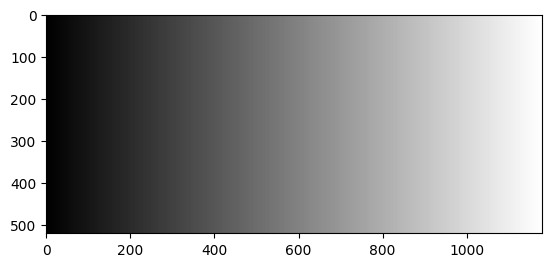

In [8]:
plt.imshow(np.load('output/us_map.npy')[:, :, 1], cmap='gray')

In [10]:
from src.generate_matrix import xMap, landMass

C:\Users\pc\OneDrive - HEC Montréal


In [12]:
os.getcwd()

'C:\\Users\\pc\\OneDrive - HEC Montréal'

In [14]:
df = pd.read_excel('data/GEM-GGIT-LNG-Terminals-July2022_copy.xlsx')

df =df[(df.Country == 'United States') & (df.Status != 'Cancelled')]

excluded_states = ['Alaska', 'Puerto Rico', 'Hawaii', 'Penuelas']
for state in excluded_states:
    df = df[df['State/Province'] != state]

df['CapacityInMtpa'].replace('--', 0, inplace=True)
df['StartYear1'] = pd.to_numeric(df['StartYear1'], errors='coerce')

df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

df

,TerminalID,ProjectID,ComboID,Country,Region,Wiki,TerminalName,UnitName,OtherEnglishNames,Owner,...,State/Province,Latitude,Longitude,Accuracy,Floating,FID,FIDYear,OtherLanguageName,PowerPlantsSupplied,OtherLanguageWikiPage
0,T0205,1,T020501,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 1,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],...,Louisiana,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN
1,T0205,2,T020502,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 2,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],...,Louisiana,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN
6,T0208,1,T020801,United States,North America,https://www.gem.wiki/American_LNG_Hialeah_Term...,American LNG Hialeah Terminal,NaN,NaN,Fortress Investment Group [100.00%],...,Florida,25.809175,-80.296697,approximate,NaN,NaN,NaN,NaN,NaN,NaN
7,T0209,1,T020901,United States,North America,https://www.gem.wiki/American_LNG_Titusville_T...,American LNG Titusville Terminal,NaN,NaN,American LNG Marketing LLC [100.00%],...,Florida,28.591111,-80.820000,approximate,NaN,NaN,NaN,NaN,NaN,NaN
14,T0212,1,T021201,United States,North America,https://www.gem.wiki/Calcasieu_Pass_LNG_Terminal,Calcasieu Pass LNG Terminal,T1,NaN,Venture Global Calcasieu Pass [100.00%],...,Louisiana,29.772927,-93.334304,exact,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,T0985,2,T098502,United States,North America,https://www.gem.wiki/Delta_LNG_Terminal,Delta LNG Terminal,Phase 2 (T19–T36),NaN,"Venture Global Delta LNG, LLC [100.00%]",...,Louisiana,29.597258,-89.872471,approximate,NaN,NaN,NaN,NaN,NaN,NaN
1096,T0987,1,T098701,United States,North America,https://www.gem.wiki/West_Delta_LNG_Deepwater_...,West Delta LNG Deepwater Port Terminal,NaN,NaN,"West Delta LNG, LLC [100.00%]",...,Louisiana,29.067000,-89.656000,approximate,NaN,NaN,NaN,NaN,NaN,NaN
1106,T1002,1,T100201,United States,North America,https://www.gem.wiki/New_Fortress_Grand_Isle_F...,New Fortress Grand Isle FLNG Terminal,NaN,NaN,New Fortress Energy Louisiana LLC [100.00%],...,Louisiana,29.059022,-89.822603,approximate,yes,NaN,NaN,NaN,NaN,NaN
1112,T1009,1,T100901,United States,North America,https://www.gem.wiki/Northeast_Energy_Center_L...,Northeast Energy Center LNG Terminal,NaN,NaN,Northeast Energy Center LLC [100.00%],...,Massachusetts,42.106794,-72.015988,exact,NaN,FID,2021,NaN,NaN,NaN


In [15]:
def adjust_capacity(cap, export):
    if export == "Export":
        return -cap
    else:
        return cap

df['CapacityInMtpa'] = df.apply(lambda x: adjust_capacity(x['CapacityInMtpa'], x['Import/Export']), axis=1)


df_clean = df[['StartYear1', 'StartYear2', 'StartYear3', 'CapacityInMtpa', 'Latitude', 'Longitude']]
df_clean

,StartYear1,StartYear2,StartYear3,CapacityInMtpa,Latitude,Longitude
0,2022.0,NaN,NaN,-2.00,29.105833,-90.194444
1,2023.0,NaN,NaN,-3.00,29.105833,-90.194444
6,2016.0,NaN,NaN,-0.06,25.809175,-80.296697
7,NaN,NaN,NaN,-0.63,28.591111,-80.820000
14,2022.0,NaN,NaN,-0.67,29.772927,-93.334304
...,...,...,...,...,...,...
1095,2025.0,NaN,NaN,-11.30,29.597258,-89.872471
1096,2023.0,NaN,NaN,-6.10,29.067000,-89.656000
1106,2023.0,NaN,NaN,-2.80,29.059022,-89.822603
1112,2023.0,NaN,NaN,-0.15,42.106794,-72.015988


In [16]:
df_clean.to_csv('data/terminal_clean.csv', index=False)

In [44]:
xMap = np.load('output/us_map.npy')
landmass = np.load('output/us_landmass.npy')

In [18]:
terminal_map = np.zeros(xMap.shape[:2])

In [38]:
last_x = None; last_y = None

for i in range(len(df_clean)):
    # given latitute and longitude, find the closest point in the xmap
    lat = df_clean.iloc[i]['Latitude'] if df_clean.iloc[i]['Latitude'] > xMap[:,:, 0].min() and df_clean.iloc[i]['Latitude'] < xMap[:,:, 0].max() else None
    lon = df_clean.iloc[i]['Longitude'] if df_clean.iloc[i]['Longitude'] > xMap[:,:, 1].min() and df_clean.iloc[i]['Longitude'] < xMap[:,:, 1].max() else None
    if lat and lon:
        x, y = np.unravel_index(np.argmin(np.sqrt((xMap[:, :, 0] - lat) ** 2 + (xMap[:, :, 1] - lon) ** 2)), xMap.shape[:2])
        if x != last_x and y != last_y:
            print(x, y)
        terminal_map[x, y] += df_clean.iloc[i]['CapacityInMtpa']
        print('\n\t' + str(terminal_map[x, y]), end='\r')
    print("count " + str(i), end='\r')
    last_x = x; last_y = y


511 3481

count 0
181 4470

459 4418

577 3167

count 4
count 5
count 6
count 7
count 8
count 90000000000002
count 10000000000004
count 11000000000005
count 12000000000007
count 1300000000001
count 1400000000001
count 15000000000012
count 16000000000014
count 17000000000015
count 18000000000017
count 1900000000002
count 2000000000002
530 3564000000000022

count 22
604 3166

count 2400000000007
count 25999999999993
count 2699999999999
count 27
576 3165

count 29
count 30000000000001
count 31000000000001
count 32000000000002
count 33000000000002
391 2771

count 35000000000004
count 36000000000004
count 37000000000004
count 38000000000005
count 39000000000005
count 40000000000006
count 41000000000006
count 4200000000001
count 4300000000001
1439 48600000000001

count 45
514 3147

count 47
count 48
count 49
609 3167

count 51
count 52
count 53
count 5499999999999
641 433999999999999

count 56
count 57
count 58
809 4400

count 60
count 61
count 62
count 63
count 64
count 65
count 66
count 67

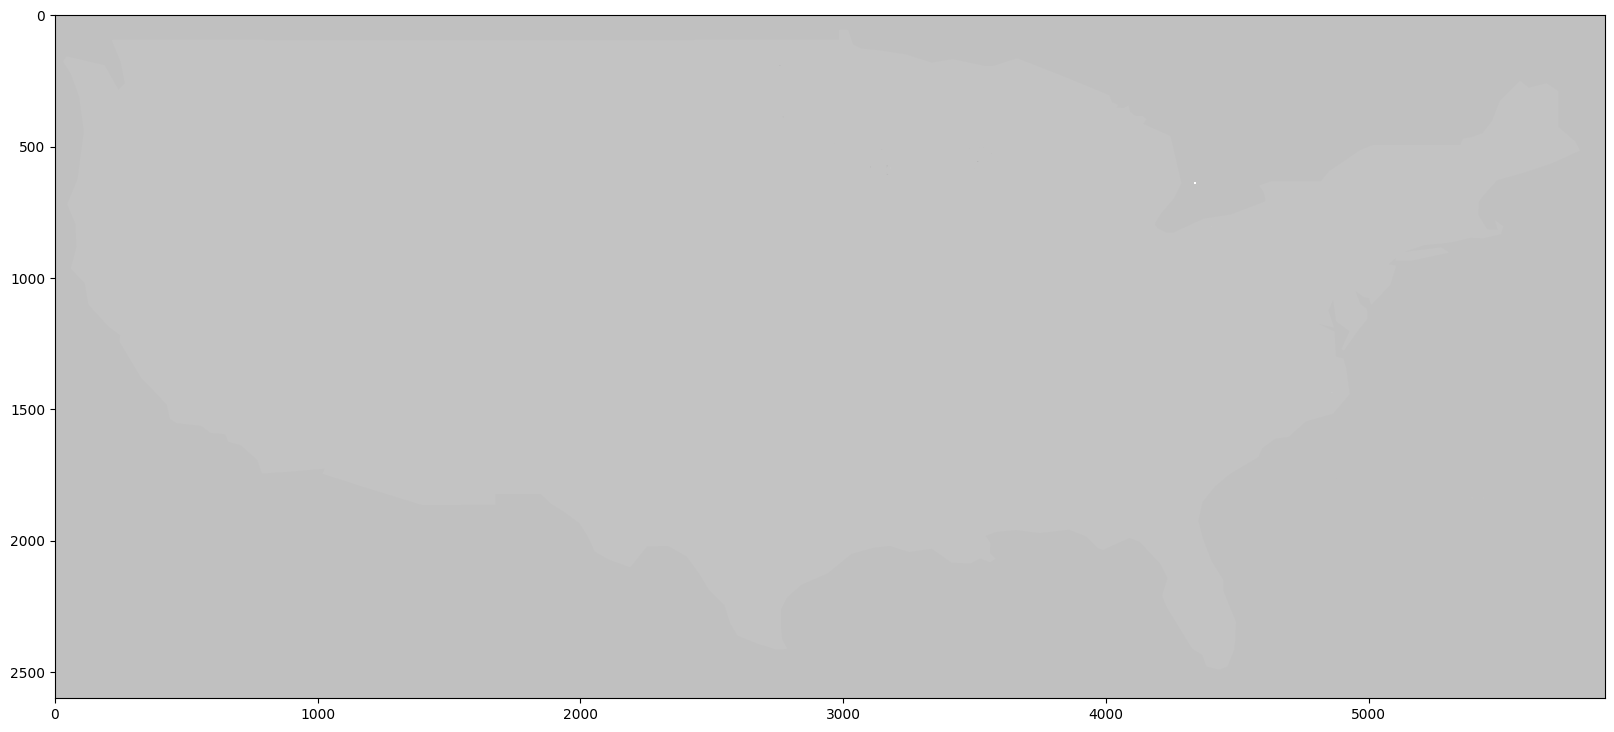

In [56]:
#change size of the figure
plt.figure(figsize=(20,10))
map_sus = terminal_map + landmass
plt.imshow(map_sus, cmap='gray')

In [43]:
terminal_map[:,1584].dtype

dtype('float64')

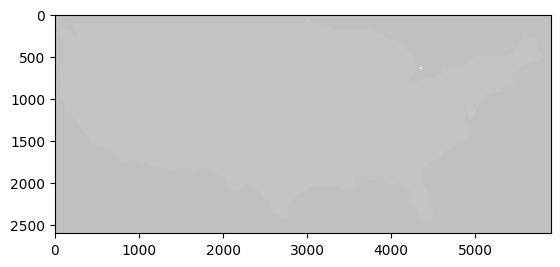

In [57]:
plt.imshow(landmass+terminal_map, cmap='gray')

In [75]:
terminal_map = np.nan_to_num(terminal_map, copy=True, nan=0.0, posinf=None, neginf=None)
for i in range(terminal_map.shape[0]):
    if terminal_map[i].mean() != 0:
        print(i, terminal_map[i].max(), "\t",  terminal_map[i].min(), "\t", terminal_map[i].mean())

181 0.0 	 -0.12 	 -2.0338983050847455e-05
195 0.0 	 -61.99999999999999 	 -0.010508474576271186
391 0.0 	 -52.96000000000001 	 -0.00897627118644068
459 0.0 	 -1.26 	 -0.00021355932203389832
493 0.0 	 -14.399999999999999 	 -0.0024406779661016948
506 0.0 	 -5.6 	 -0.0009491525423728813
507 0.0 	 -12.2 	 -0.0020677966101694915
511 0.0 	 -12.0 	 -0.002033898305084746
514 0.0 	 -24.0 	 -0.004067796610169492
530 0.0 	 -16.0 	 -0.002711864406779661
560 0.0 	 -45.2 	 -0.014440677966101696
575 1.7999999999999972 	 0.0 	 0.00030508474576271136
576 0.0 	 -16.8 	 -0.0036576271186440686
577 0.0 	 -40.0 	 -0.010867796610169496
581 0.0 	 -54.0 	 -0.013559322033898305
585 10.6 	 0.0 	 0.0017966101694915253
586 0.0 	 -12.0 	 -0.002033898305084746
604 0.0 	 -17.7 	 -0.003
609 0.0 	 -55.19999999999999 	 -0.009355932203389828
611 0.0 	 -17.599999999999998 	 -0.0029830508474576268
612 0.21999999999999886 	 0.0 	 3.728813559322014e-05
632 0.0 	 -4.119999999999997 	 -0.0006983050847457623
809 19.0 	 0.0 	 0.0

In [52]:
# random numpy array
a = np.random.rand(5,5)

b = np.zeros((5,5))

In [76]:
np.save('output/terminal_map.npy', terminal_map)

In [28]:
us = np.load("output/terminal_map.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'output/terminal_map.npy'

(52, 118, 2)